Go to this given URL and solve the following questions.
URL: https://www.youtube.com/@PW-Foundation/videos

In [1]:
import requests
from bs4 import BeautifulSoup
from pandas import DataFrame
from json import loads
url = 'https://www.youtube.com/@PW-Foundation/videos'

# Get the html by get method
r = requests.get(url)
r

<Response [200]>

In [2]:
# Create BeautifulSoup object
soup = BeautifulSoup(r.text, 'html.parser')

In [3]:
all_script_tags = soup.findAll('script')

In [4]:
def script_tag_to_json(tags: list) -> dict:
    for tag in reversed(tags):
        text: str = tag.text
        if 'ytInitialData = {"responseContext"' in text:
            return loads(text[20:-1])

    raise ValueError('Required script tag not found in the given tags.')

In [5]:
data = script_tag_to_json(all_script_tags)


In [6]:
def get_contents_dict(data):
    return data['contents']['twoColumnBrowseResultsRenderer']['tabs'][1]['tabRenderer']['content']['richGridRenderer']['contents']

Q1. Write a python program to extract the video URL of the first five videos.

In [7]:
def get_videoUrl(data:dict, n: int = 5):
    contents = get_contents_dict(data)

    if n > 30:
        raise ValueError('Max Limit is 30.')

    result = []
    for i in range(n):
        result.append('https://www.youtube.com/watch?v=' +
                      contents[i]['richItemRenderer']['content']['videoRenderer']['videoId'])

    return result

get_videoUrl(data)

['https://www.youtube.com/watch?v=WObRrneLVRY',
 'https://www.youtube.com/watch?v=nX5ONgCdLcc',
 'https://www.youtube.com/watch?v=AM2Dt7cNebw',
 'https://www.youtube.com/watch?v=7nMJVhey9TM',
 'https://www.youtube.com/watch?v=FSVVlcFUCMk']

Q2. Write a python program to extract the URL of the video thumbnails of the first five videos.

In [8]:
def get_thumbnails(data: dict, n: int = 5):
    contents = get_contents_dict(data)

    if n > 30:
        raise ValueError('Max Limit is 30.')

    result = []
    for i in range(n):
        result.append(contents[i]['richItemRenderer']['content']['videoRenderer']['thumbnail']['thumbnails'][-1]['url'])

    return result

get_thumbnails(data)

['https://i.ytimg.com/vi/WObRrneLVRY/hqdefault.jpg?sqp=-oaymwEjCNACELwBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLB22wdxfGJ8qHomPM8TcAMwI8FDRA',
 'https://i.ytimg.com/vi/nX5ONgCdLcc/hqdefault.jpg?sqp=-oaymwEjCNACELwBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLA-CsQcSMRiaxzuJVMn37GAUFS6XQ',
 'https://i.ytimg.com/vi/AM2Dt7cNebw/hqdefault.jpg?sqp=-oaymwEjCNACELwBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLDcx2UK_HLUzfaPFlhUyTJgu2fIBw',
 'https://i.ytimg.com/vi/7nMJVhey9TM/hqdefault.jpg?sqp=-oaymwEjCNACELwBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLAA1_yMeJ7aezayVqtRUmtj_G__VA',
 'https://i.ytimg.com/vi/FSVVlcFUCMk/hqdefault.jpg?sqp=-oaymwEjCNACELwBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLARIR0hJMKXJX8SLLg3G8zDQdZX2Q']

Q3. Write a python program to extract the title of the first five videos.

In [9]:
def get_title(data: dict, n:int = 5):
    contents = get_contents_dict(data)

    if n > 30:
        raise ValueError('Max Limit is 30.')

    result = []
    for i in range(n):
        result.append(contents[i]['richItemRenderer']['content']['videoRenderer']['title']['runs'][-1]['text'])

    return result

get_title(data)

['आपको Commerce में क्या सीखने को मिलता है ?? Complete Information',
 'How to Attempt English Board Exam ????',
 'Best technique to attempt SST paper in Board exam || Class 10th',
 'Last Minute Strategy To Score More Than 98% || ICSE Boards || Class-10th',
 'Why You Should Choose Commerce After 10th? || Complete Information💯']

Q4. Write a python program to extract the number of views of the first five videos.


In [10]:
def get_viwes(data: dict, n: int = 5):
    contents = get_contents_dict(data)

    if n > 30:
        raise ValueError('Max Limit is 30.')

    result = []
    for i in range(n):
        result.append(int(contents[i]['richItemRenderer']['content']['videoRenderer']['viewCountText']['simpleText']
                      [:-6].replace(',', '')))

    return result

get_viwes(data)

[9644, 183657, 58276, 24175, 29940]

Q5. Write a python program to extract the time of posting of video for the first five videos.

In [11]:
def get_time_of_posting(data: dict, n: int = 5):
    contents = get_contents_dict(data)

    if n > 30:
        raise ValueError('Max Limit is 30.')

    result = []
    for i in range(n):
        result.append(contents[i]['richItemRenderer']['content']['videoRenderer']['publishedTimeText']['simpleText'])

    return result

get_time_of_posting(data)

['1 day ago', '5 days ago', '6 days ago', '7 days ago', '8 days ago']

Save all the data scraped in the above questions in a CSV file.

In [12]:
def get_channel_video_details(data: dict, n: int):
    thumbnails = get_thumbnails(data, n)
    time_of_posting = get_time_of_posting(data, n)
    titles = get_title(data, n)
    video_urls = get_videoUrl(data, n)
    views=get_viwes(data,n)

    main_data = list(zip(video_urls, titles, thumbnails, views ,time_of_posting))
    
    df = DataFrame.from_dict(main_data)
    df.rename(
        columns={
            0: 'video_urls',
            1: 'title',
            2: 'thumbnail_url',
            3: 'views',
            4: 'time_of_posting'
        }, inplace=True)

    return df

In [13]:
channel_data = get_channel_video_details(data, 30)


In [14]:
channel_data.to_csv('PW-Foundation.csv', index=False)


output:
 
 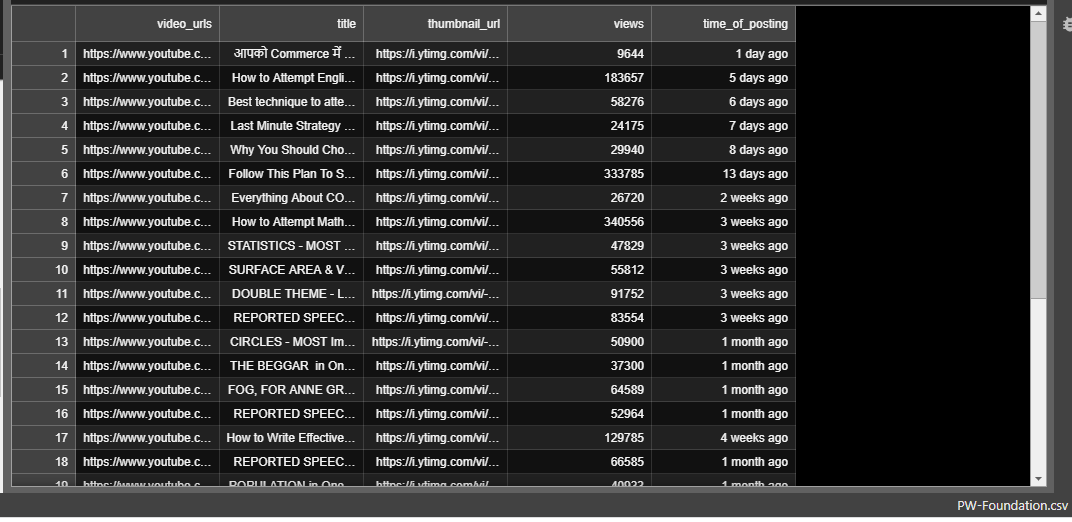
    

Link To The CSV File:
https://github.com/Sunitaprog/AWS-Youtube-Scrapper/blob/main/PW-Foundation.csv

Code for the Flask Front-End:

application.py

In [ ]:
from flask import Flask, render_template, request, jsonify
from flask_cors import CORS,cross_origin
import logging
import os
import requests
import re
import pandas as pd

BASE_DIR = os.path.dirname(os.path.abspath(__file__))
logging.basicConfig(filename=os.path.join(BASE_DIR, "scraper_logs.log") , level=logging.INFO)

app = Flask(__name__)	

@app.route("/", methods=["GET"])
@cross_origin()
def index():
	return render_template('index.html')

@app.route("/details", methods=["GET","POST"])
@cross_origin()
def details():
	if request.method == "POST":
		try:
			input_text = request.form['text']
			url = f'https://www.youtube.com/@{input_text}/videos'
			headers = {
			'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; rv:91.0) Gecko/20100101 Firefox/91.0',
			'Accept-Language': 'en-US,en;q=0.9'
			}

			logging.info("Requesting HTML...")
			response = requests.get(url, headers=headers)
			response_text = response.text

			#titles
			logging.info("Finding titles...")
			vid_titles = re.findall('"title":{"runs":\[{"text":".*?"', response_text)

			#thumbnails
			logging.info("Finding thumbnails...")
			vid_thumbnails = re.findall(r"https://i.ytimg.com/vi/[A-Za-z0-9_-]{11}/[A-Za-z0-9_]{9}.jpg", response_text)

			#links
			logging.info("Finding links...")
			vid_links = re.findall(r"watch\?v=[A-Za-z0-9_-]{11}", response_text)

			#view count
			logging.info("Finding view counts...")
			pattern3 = re.compile(r"[0-9]+(\.[0-9]+)?[a-zA-Z]*K views")

			#time posted
			logging.info("Finding videos age...")
			pattern4 = re.compile(r"\d+ (minutes|hours|hour|days|day|weeks|week|years|year) ago")

			matches1 = pattern3.finditer(response_text)
			matches2 = pattern4.finditer(response_text)

			vid_viewcounts=[]
			vid_ages=[]
			count = 0
			for match1,match2 in zip(matches1,matches2):
				vid_ages.append(match2[0])
				vid_viewcounts.append(match1[0])

			logging.info("Storing titles...")
			title = vid_titles[0:10]
			logging.info("Storing thumbnails...")
			thumbnail_url= list(dict.fromkeys(vid_thumbnails))
			logging.info("Storing links...")
			video_url= vid_links[0:10]
			logging.info("Storing viewcounts...")
			views=vid_viewcounts[0:20:2]
			logging.info("Storing videos ...")
			time_of_posting=vid_ages[0:20:2]

			details_list=[]

			for video_url,title,thumbnail_url,views,time_of_posting in zip(video_url,title,thumbnail_url,views,time_of_posting):
				details_dict={
				"title":title.split('"')[-2], "thumbnail_url": thumbnail_url, "video_urls": "https://www.youtube.com/"+link,
				"views": views, "time_of_posting": time_of_posting
				}
				details_list.append(details_dict)

			#storing data into a csv file
			df = pd.DataFrame(details_list)
			df.to_csv('PW-Foundation.csv', index=False)

			return render_template('details.html', details=details_list, channel=input_text)
		

		except Exception as e:
			print(e)

if __name__ == "__main__":
	app.run(host='0.0.0.0', port=8000, debug=True)
	#app.run(debug = True)


Link to the GitHub Folder of this project:

It contains all the files and everything regarding this project.
https://github.com/Sunitaprog/youtube-scrapper
